Import Libraries


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json("livedata.json")
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


Now we focus on analyzing the dataspot using a scatterplot, which shows their ids with longitude/latitudes:


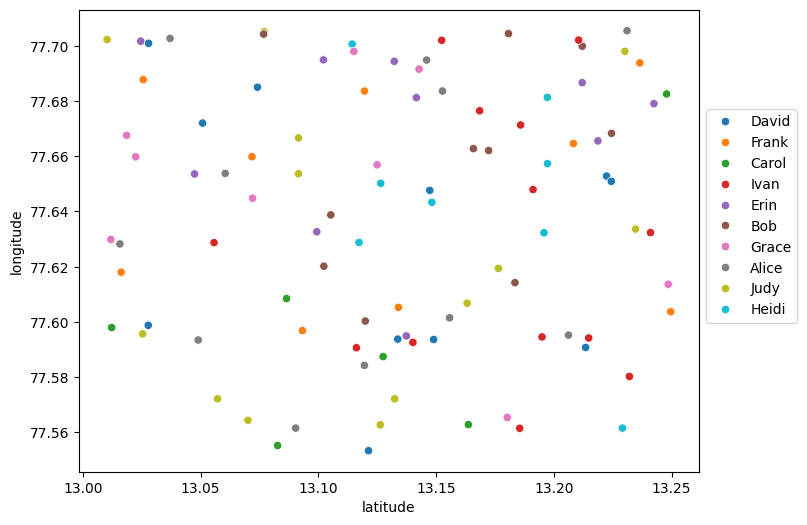

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="id")
plt.legend(bbox_to_anchor = [1, 0.8])
plt.show()

Given the scatterplot above, we can now create a Machine Learning model for contact tracing. We are going to use the DBSCAN model, which will help us generate clusters, which in turn will allow us to identify any infections by filtering the data.


In [66]:

import pandas as pd
from sklearn.cluster import DBSCAN
from math import radians
# convert degrees to radians for latitude and longitude
df = pd.read_json("livedata.json")
df['latitude'] = df['latitude'].apply(radians)
df['longitude'] = df['longitude'].apply(radians)

def get_infected_names(input_name):
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers

    # use haversine distance with radians data
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass

    return infected_names

# test with input name "David"
print(get_infected_names("David"))

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']


Given this model, we can now generate clusters with it.


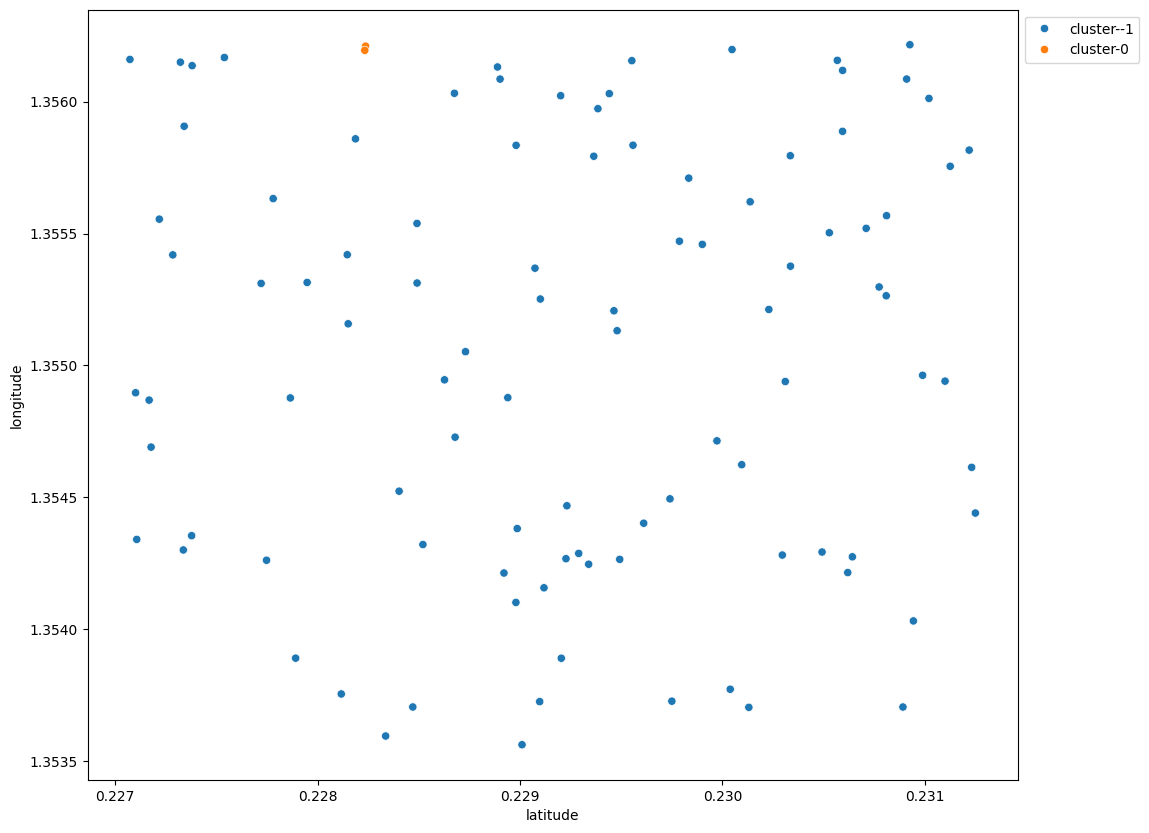

In [67]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [65]:
print(get_infected_names("Erin"))

['David', 'Frank', 'Carol', 'Ivan', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
